### Bike Sharing Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv('day.csv')
df =  dataset.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.rename(columns = {'instant':'Ref_id','dteday':'Date','yr':'Year','mnth':'Month','temp':'Normalised_temp','weathersit':'Weather','atemp':'Temp_feeling'
                   ,'hum':'Humidity','cnt':'Rental_count'},inplace=True)
df

,Ref_id,Date,season,Year,Month,holiday,weekday,workingday,Weather,Normalised_temp,Temp_feeling,Humidity,windspeed,casual,registered,Rental_count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [5]:
total = df.isnull().sum()
percent =( total / (df.isnull().count()*100) )
missing_column = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
types = []
for col in df.columns:
    dtype = str(df[col].dtype)
    types.append(dtype)
missing_column['Types'] = types
missing_column

,Total,Percent,Types
Ref_id,0,0.0,int64
Date,0,0.0,object
season,0,0.0,int64
Year,0,0.0,int64
Month,0,0.0,int64
holiday,0,0.0,int64
weekday,0,0.0,int64
workingday,0,0.0,int64
Weather,0,0.0,int64
Normalised_temp,0,0.0,float64


In [6]:
df.describe()

,Ref_id,season,Year,Month,holiday,weekday,workingday,Weather,Normalised_temp,Temp_feeling,Humidity,windspeed,casual,registered,Rental_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


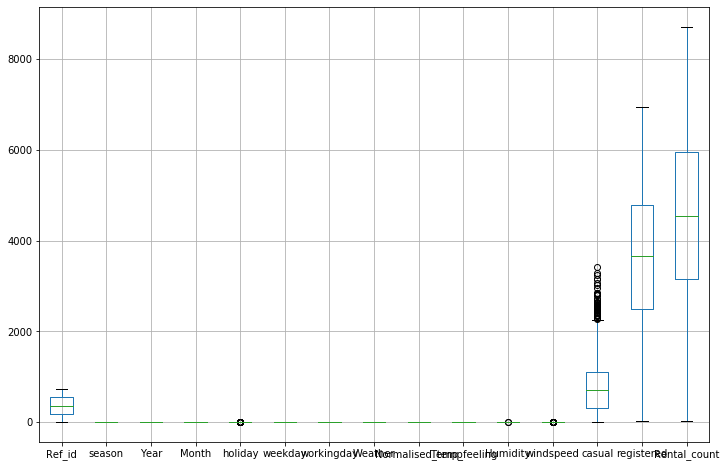

In [7]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.show()

### Making sure all category variables are as type 'category'

In [8]:
df['Date']=pd.to_datetime(df.Date)
df['season']=df.season.astype('category')
df['Year']=df.Year.astype('category')
df['Month']=df.Month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['Weather']=df.Weather.astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
Ref_id             731 non-null int64
Date               731 non-null datetime64[ns]
season             731 non-null category
Year               731 non-null category
Month              731 non-null category
holiday            731 non-null category
weekday            731 non-null category
workingday         731 non-null category
Weather            731 non-null category
Normalised_temp    731 non-null float64
Temp_feeling       731 non-null float64
Humidity           731 non-null float64
windspeed          731 non-null float64
casual             731 non-null int64
registered         731 non-null int64
Rental_count       731 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.8 KB


In [9]:
# Removing Outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

remove_outlier(df,'Normalised_temp')
remove_outlier(df,'Temp_feeling')
remove_outlier(df,'Humidity')
remove_outlier(df,'windspeed')
remove_outlier(df,'casual')
remove_outlier(df,'registered')
remove_outlier(df,'Rental_count')

,Ref_id,Date,season,Year,Month,holiday,weekday,workingday,Weather,Normalised_temp,Temp_feeling,Humidity,windspeed,casual,registered,Rental_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-03-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-04-01,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-05-01,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-06-01,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-07-01,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-08-01,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-09-01,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-10-01,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


# season wise distribution of parameters
#### 1: Clear, Few clouds, Partly cloudy, Partly cloudy.
####  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [10]:
df.groupby('season')[['Normalised_temp','Temp_feeling','Humidity','windspeed','casual','registered','Rental_count']].mean()

,Normalised_temp,Temp_feeling,Humidity,windspeed,casual,registered,Rental_count
season,,,,,,,
1,0.297748,0.296914,0.582903,0.214537,334.928177,2269.204420,2604.132597
2,0.544405,0.520307,0.626948,0.203507,1106.097826,3886.233696,4992.331522
3,0.706309,0.655898,0.633482,0.172095,1202.611702,4441.691489,5644.303191
4,0.422906,0.415539,0.668719,0.171995,729.112360,3999.050562,4728.162921


In [11]:
# Weekday wise distribution

df.groupby('weekday')[['Normalised_temp','Temp_feeling','Humidity','windspeed','casual','registered','Rental_count']].mean()

,Normalised_temp,Temp_feeling,Humidity,windspeed,casual,registered,Rental_count
weekday,,,,,,,
0,0.483628,0.465288,0.627659,0.188530,1338.295238,2890.533333,4228.828571
1,0.493449,0.474563,0.637577,0.190691,674.133333,3663.990476,4338.123810
2,0.504282,0.483337,0.641829,0.191825,556.182692,3954.480769,4510.663462
3,0.504626,0.481610,0.645368,0.187736,551.144231,3997.394231,4548.538462
4,0.504342,0.482700,0.609499,0.191603,590.961538,4076.298077,4667.259615
5,0.495589,0.471112,0.613756,0.186389,752.288462,3938.000000,4690.288462
6,0.482038,0.462071,0.619560,0.196588,1465.257143,3085.285714,4550.542857


### Handling the Missing values 

In [12]:
df['Weather'] = df['Weather'].fillna(method ='pad')
df['Normalised_temp'].fillna((df['Normalised_temp'].mean()), inplace=True)
df['Temp_feeling'].fillna((df['Temp_feeling'].mean()), inplace=True)
df['Humidity'].fillna((df['Humidity'].mean()), inplace=True)
df['windspeed'].fillna((df['windspeed'].mean()), inplace=True)
df['registered'].fillna((df['registered'].mean()), inplace=True)
df['Rental_count'].fillna((df['Rental_count'].mean()), inplace=True)
df['weekday'] = df['weekday'].fillna(method = 'pad')
df['Month'] = df['Month'].fillna(method = 'pad')

df.isnull().sum()

Ref_id             0
Date               0
season             0
Year               0
Month              0
holiday            0
weekday            0
workingday         0
Weather            0
Normalised_temp    0
Temp_feeling       0
Humidity           0
windspeed          0
casual             0
registered         0
Rental_count       0
dtype: int64

# Exploratory Data Analysis

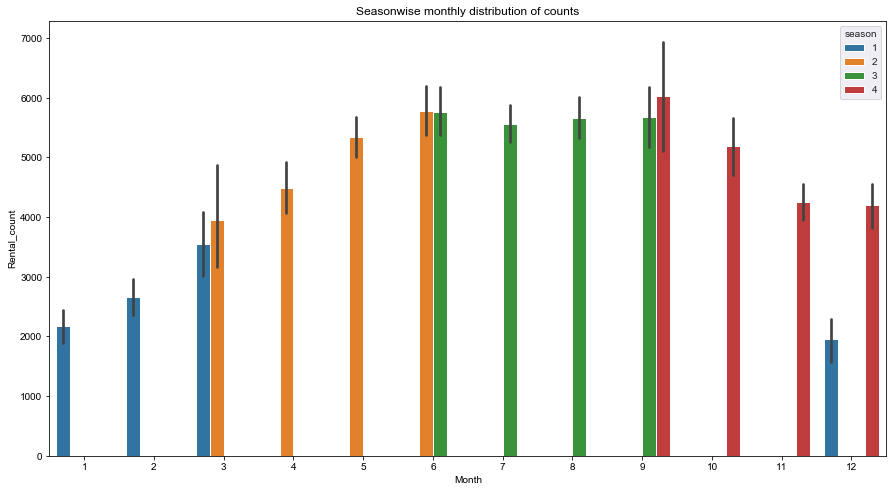

In [13]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('dark')

#Bar plot for seasonwise monthly distribution of counts

sns.barplot(x='Month',y='Rental_count',data=df[['Month','Rental_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

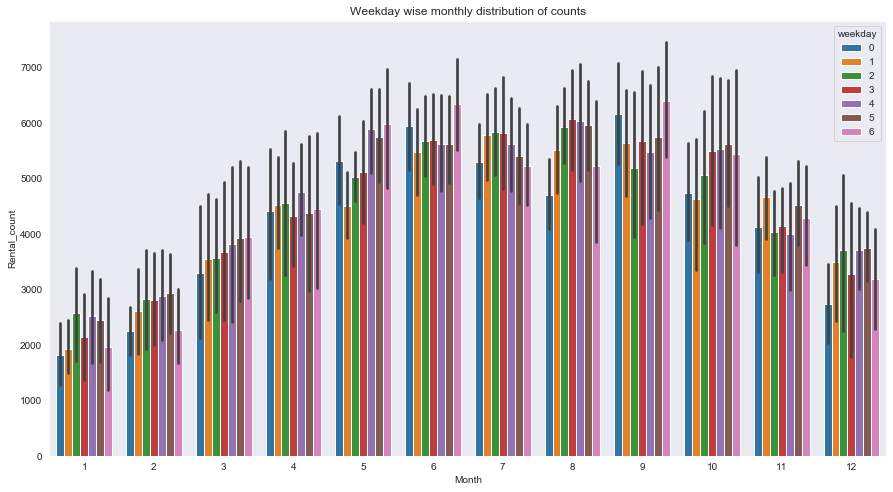

In [14]:
#Bar plot for weekday wise monthly distribution of counts

fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='Rental_count',data=df[['Month','Rental_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()


### From the above plots, we can observed that increasing the bike rental count in spring and summer season and then decreasing the bike rental count in fall and winter season. Here,

### season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

### Yearwise distribution of Rental Counts

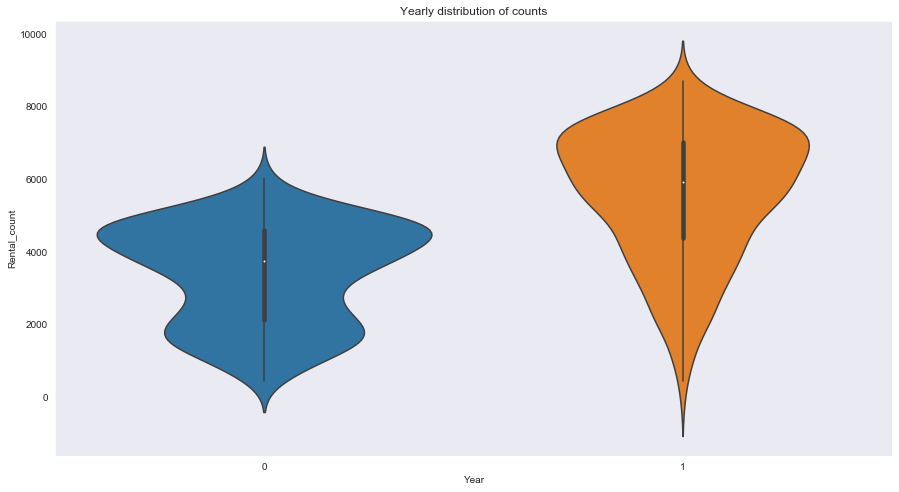

In [15]:
fig,ax=plt.subplots(figsize=(15,8))

#Violin plot for yearly distribution of counts

sns.violinplot(x='Year',y='Rental_count',data=df[['Year','Rental_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

### From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011.

Here,
year 0-> 2011, year 1-> 2012

# Temp_feeling_windspeed_humidity_outliers

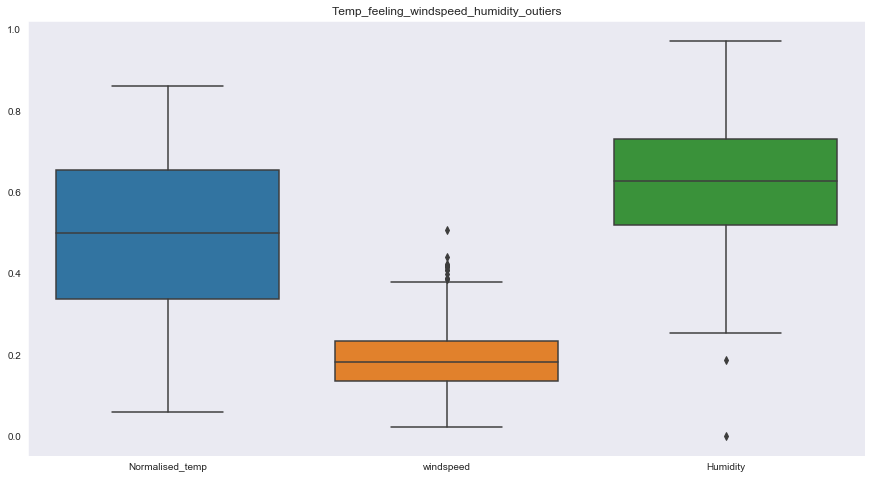

In [16]:

fig,ax=plt.subplots(figsize=(15,8))

#Box plot for Temp_feeling_windspeed_humidity_outliers

sns.boxplot(data=df[['Normalised_temp','windspeed','Humidity']])
ax.set_title('Temp_feeling_windspeed_humidity_outiers')
plt.show()

### From the box plot, we can observed that no outliers are present in normalized Normalised_temp but few outliers are present in normalized windspeed and humidity variable.

### Correlation matrix

Correlation matrix is tells about linear relationship between attributes and help us to build better models.

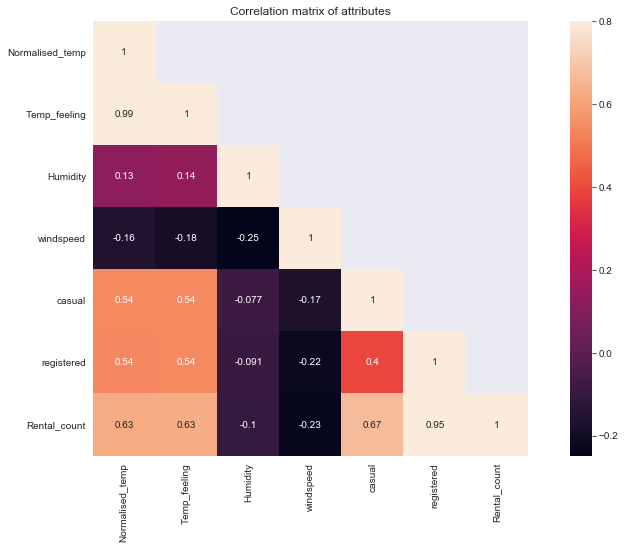

In [17]:
#Create the correlation matrix
Corr=df[["Normalised_temp","Temp_feeling","Humidity","windspeed","casual","registered","Rental_count"]].corr()
mask=np.array(Corr)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes

fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(Corr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

### From correlation plot, we can observe that some features are positively correlated or some are negatively correlated to each other. The Normalised_temp and Temp_feeling are highly positively correlated to each other, it means that both are carrying same information.The Rental_count,casual and registered are highly positively correlated to each other. So, we are going to ignore Temp_feeling,casual and registered variable for further analysis.



### Monthwise plot of boxplots

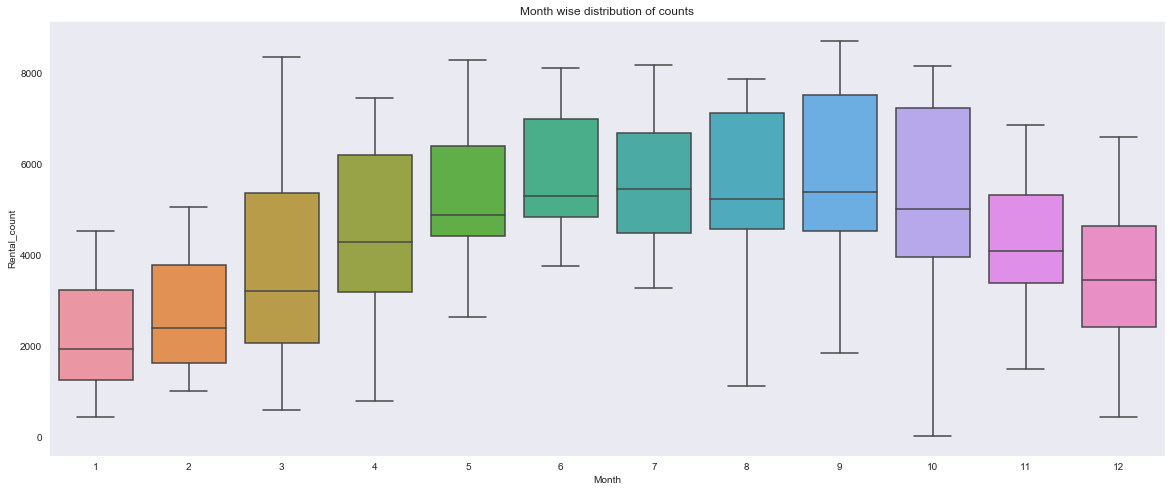

In [18]:

fig,ax1=plt.subplots(figsize=(20,8))
sns.boxplot(x='Month',y='Rental_count',data=df[['Month','Rental_count']],ax=ax1)
ax1.set_title('Month wise distribution of counts')
plt.show()

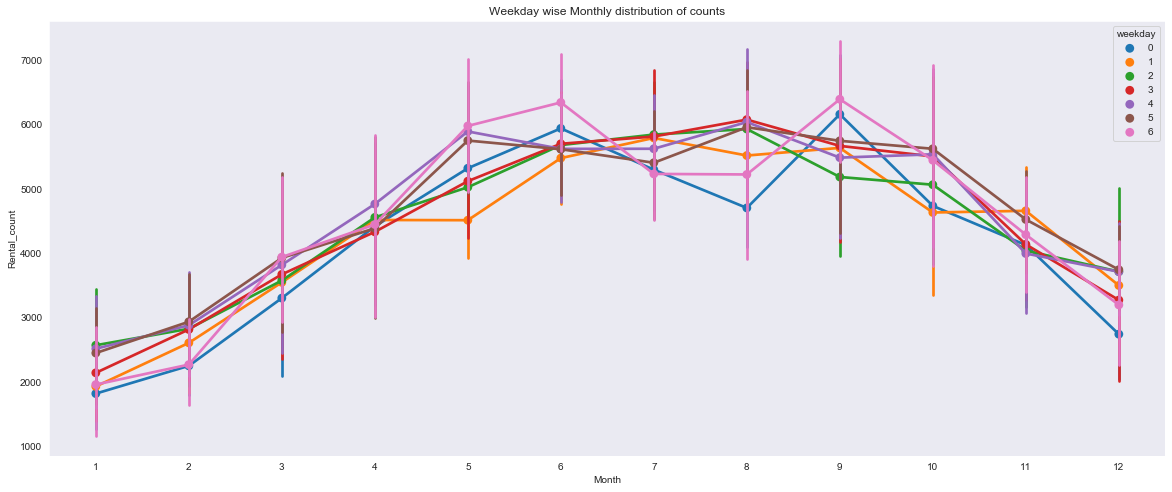

In [19]:
#Weekday wise Monthly distribution of counts

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Month',y='Rental_count',data=df[['Month','Rental_count','weekday']],hue='weekday')
ax.set_title('Weekday wise Monthly distribution of counts')
plt.show()

### Normal Probability Plot

Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

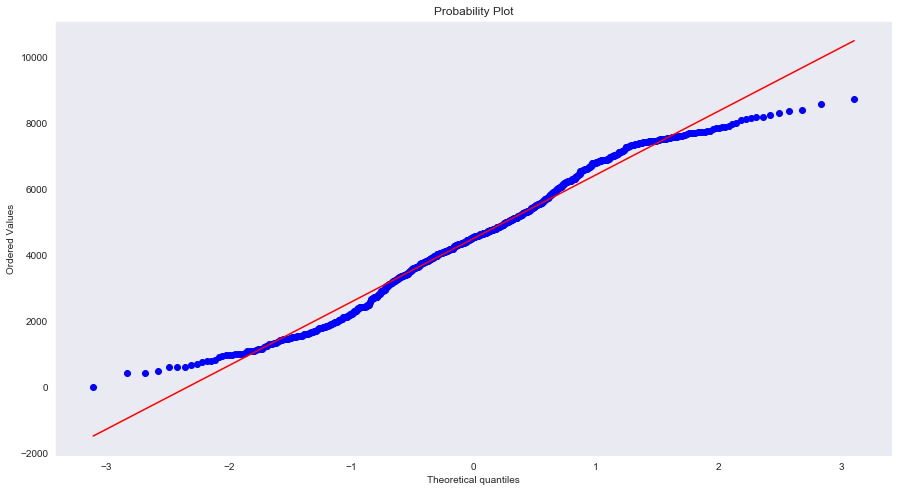

In [20]:
import scipy
from scipy import stats
#Normality plot
fig=plt.figure(figsize=(15,8))
stats.probplot(df.Rental_count.tolist(),dist='norm',plot=plt)
plt.show()

### The above probability plot,shows that some target variable data points are deviating from normality.



In [21]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [22]:
#Split the dataset into the train and test data
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-3],df.iloc[:,-1],test_size=0.3, random_state=10)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(511, 13) (220, 13) (511,) (220,)


In [53]:
y_train.head()

72     2046
510    6734
701    4649
264    4795
577    7216
Name: Rental_count, dtype: int64

In [24]:
#Create a new dataset for train columns
cat_train= X_train[['season','Month','Year','weekday','holiday','workingday','Weather','Humidity','Normalised_temp','windspeed']]
#Create a new dataset for test columns
cat_test = X_test[['season','Month','Year','weekday','holiday','workingday','Humidity','Normalised_temp','windspeed','Weather']]
#categorical columns
cat_col = ['season','holiday','workingday','Weather','Year']
#numerical columns
num_col = ['Normalised_temp','windspeed','Humidity','month','weekday']

In [25]:
#To get dummy variables for  the categorical features to numeric
train_col=pd.get_dummies(cat_train,columns=cat_col)
print('Shape of transfomed dataframe::',train_col.shape)
train_col.head(5)

Shape of transfomed dataframe:: (511, 18)


,Month,weekday,Humidity,Normalised_temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,Weather_1,Weather_2,Weather_3,Year_0,Year_1
72,3,1,0.496957,0.325217,0.136926,1,0,0,0,1,0,0,1,1,0,0,1,0
510,5,5,0.747083,0.680000,0.140550,0,1,0,0,1,0,0,1,1,0,0,0,1
701,12,0,0.823333,0.347500,0.124379,0,0,0,1,1,0,1,0,0,1,0,0,1
264,9,4,0.902083,0.628333,0.128125,0,0,1,0,1,0,0,1,0,1,0,1,0
577,7,2,0.704167,0.713333,0.165425,0,0,1,0,1,0,0,1,1,0,0,0,1


In [38]:
#Training dataset for modelling
X_train=train_col

In [30]:
#training model
reg_model=linear_model.LinearRegression()
reg_model.fit(X_train,y_train)
lr=reg_model.score(X_train,y_train)

### Linear Regression: Training MSE, RMSE, R<sup>2</sup>

In [62]:
y_train_preds = reg_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_preds)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 594342.9572009849
RMSE: 770.9364157963904
R2: 0.8409136334884939


In [63]:
#To get dummy variables for the categorical features to numeric
test_col=pd.get_dummies(cat_test,columns=cat_col)
print('Shape of transfomed dataframe::',test_col.shape)
test_col.head(5)

Shape of transfomed dataframe:: (220, 18)


,Month,weekday,Humidity,Normalised_temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,Weather_1,Weather_2,Weather_3,Year_0,Year_1
566,7,5,0.844167,0.665833,0.208967,0,0,1,0,1,0,0,1,0,1,0,0,1
374,1,2,0.646522,0.308696,0.187552,1,0,0,0,1,0,0,1,1,0,0,0,1
181,7,5,0.396250,0.722500,0.102608,0,0,1,0,1,0,0,1,1,0,0,1,0
529,6,3,0.582083,0.655833,0.343279,0,1,0,0,1,0,0,1,1,0,0,0,1
233,8,1,0.470000,0.691667,0.276750,0,0,1,0,1,0,0,1,1,0,0,1,0


In [64]:
#Testing dataset for the model
X_test = test_col

### Linear Regression: Testing MSE, RMSE, R<sup>2</sup>

In [65]:
y_test_preds = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_test_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_preds)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 792478.326478362
RMSE: 890.2125175924915
R2: 0.7900541497343996


### Residual Plot

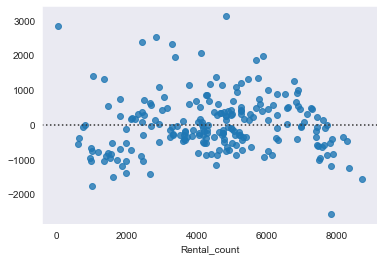

In [66]:
sns.residplot(y_test, y_test_preds)
plt.show()

## Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
dt_regr = DecisionTreeRegressor(max_depth = 3, max_leaf_nodes=3)
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Decision Tree Regression: Training MSE, RMSE, R<sup>2</sup>

In [69]:
y_train_preds = dt_regr.predict(X_train)
mse = mean_squared_error(y_train, y_train_preds)
rmse = np.sqrt(mse)
r2 = regr.score(X_train, y_train)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 1419198.0116555872
RMSE: 1191.3009744206488
R2: 0.6201266418669908


### Decision Tree Regression: Testing MSE, RMSE, R<sup>2</sup>

In [71]:
y_test_preds = regr.predict(X_test)
mse = mean_squared_error(y_test, y_test_preds)
rmse = rmse = np.sqrt(mse)
r2 = regr.score(X_test, y_test)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 1671897.6663683257
RMSE: 1293.0188190310014
R2: 0.5570756128024463


## Gradient Boosting Regression

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [75]:
bins = np.arange(6)
binned_y = np.digitize(df.iloc[:,-1], bins, right=False)

In [76]:
#Split the dataset into the train and test data
train_X, test_X, train_y, test_y = train_test_split(df.iloc[:,0:-3],df.iloc[:,-1], test_size=0.3, random_state=10, stratify = binned_y)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(511, 13) (220, 13) (511,) (220,)


In [81]:
#Create a new dataset for train columns
cat_train = train_X[['season','Month','Year','weekday','holiday','workingday','Weather','Humidity','Normalised_temp','windspeed']]
#Create a new dataset for test columns
cat_test = test_X[['season','Month','Year','weekday','holiday','workingday','Humidity','Normalised_temp','windspeed','Weather']]
#categorical columns
cat_col = ['season','holiday','workingday','Weather','Year']
#numerical columns
num_col = ['Normalised_temp','windspeed','Humidity','month','weekday']

In [82]:
#To get dummy variables for  the categorical features to numeric
train_col = pd.get_dummies(cat_train,columns=cat_col)
print('Shape of transfomed dataframe::',train_col.shape)
train_col.head(5)

Shape of transfomed dataframe:: (511, 18)


,Month,weekday,Humidity,Normalised_temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,Weather_1,Weather_2,Weather_3,Year_0,Year_1
195,7,5,0.591250,0.663333,0.182833,0,0,1,0,1,0,0,1,1,0,0,1,0
450,3,1,0.477917,0.445833,0.386821,0,1,0,0,1,0,0,1,1,0,0,0,1
85,3,0,0.493913,0.253043,0.184300,0,1,0,0,1,0,1,0,0,1,0,1,0
632,9,1,0.492917,0.514167,0.142404,0,0,0,1,1,0,0,1,1,0,0,0,1
507,5,2,0.765833,0.615000,0.118167,0,1,0,0,1,0,0,1,0,1,0,0,1


In [84]:
#Training dataset for modelling
train_X = train_col

In [85]:
param_dist = {'max_features': ['log2', 1.0],
             'max_depth': [3, 5, 7, 10],
             'min_samples_leaf': [2, 3, 5, 10],
             'n_estimators': [50, 100],
             'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3],
             'loss': ['ls', 'huber']}

In [86]:
pre_gb_model = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True), 
                                  param_distributions=param_dist,
                                  cv=3, 
                                  n_iter=30, 
                                  n_jobs=-1)

In [87]:
pre_gb_model.fit(train_X, train_y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [88]:
pre_gb_model.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 7,
 'loss': 'huber',
 'learning_rate': 0.1}

In [89]:
rs_gbt = GradientBoostingRegressor(warm_start=True,
                                   n_estimators= 100,
                                   min_samples_leaf= 3,
                                   max_features='log2', 
                                   max_depth=7,
                                   loss='huber',
                                   learning_rate= 0.1)

In [90]:
rs_gbt.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=7, max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)

### Gradient Boosting Regression: Training MSE, RMSE, R<sup>2</sup>

In [92]:
y_train_preds = rs_gbt.predict(train_X)
mse = mean_squared_error(train_y, y_train_preds)
rmse = np.sqrt(mse)
r2 = r2_score(train_y, y_train_preds)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:", r2)

MSE: 23896.565009921265
RMSE: 154.58513838633152
R2: 0.9936345741550789


In [93]:
#To get dummy variables for  the categorical features to numeric
test_col = pd.get_dummies(cat_test,columns=cat_col)
print('Shape of transfomed dataframe::',test_col.shape)
test_col.head(5)

Shape of transfomed dataframe:: (220, 18)


,Month,weekday,Humidity,Normalised_temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,Weather_1,Weather_2,Weather_3,Year_0,Year_1
606,8,3,0.552083,0.685000,0.112562,0,0,1,0,1,0,0,1,1,0,0,0,1
319,11,3,0.930000,0.456667,0.136829,0,0,0,1,1,0,0,1,0,0,1,1,0
516,5,4,0.492917,0.680000,0.195279,0,1,0,0,1,0,0,1,1,0,0,0,1
723,12,1,0.791304,0.231304,0.077230,1,0,0,0,1,0,0,1,0,1,0,0,1
258,9,5,0.590417,0.469167,0.164183,0,0,1,0,1,0,0,1,0,1,0,1,0


In [94]:
#Testing dataset for the model
test_X = test_col

### Gradient Boosting Regression: Testing MSE, RMSE, R<sup>2</sup>

In [95]:
y_test_preds = rs_gbt.predict(test_X)
mse = mean_squared_error(test_y, y_test_preds)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_test_preds)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:", r2)

MSE: 427290.4445624674
RMSE: 653.6745708397011
R2: 0.8852629043124525


### Residual Plot

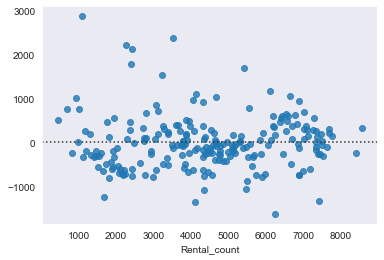

In [96]:
sns.residplot(test_y, y_test_preds)
plt.show()

## Adaboost Regression

In [97]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [98]:
param_dist = {'n_estimators':[50, 100],
             'learning_rate':[0.01, 0.05, 0.1, 0.3, 1],
             'loss':['linear', 'square', 'exponential']}

In [99]:
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(), param_distributions=param_dist,cv=3,n_iter=30,n_jobs=-1)

In [100]:
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [101]:
ada_best = pre_gs_inst.best_params_

In [102]:
rs_ada = AdaBoostRegressor(**ada_best)
rs_ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='square',
                  n_estimators=100, random_state=None)

### Adaboost Regression: Training MSE, RMSE, R<sup>2</sup>

In [104]:
y_train_preds = rs_ada.predict(X_train)
mse = mean_squared_error(y_train, y_train_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_preds)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:", r2)

MSE: 3438110.8726796983
RMSE: 1854.214354566294
R2: 0.07972903561578504


### Adaboost Regression: Testing MSE, RMSE, R<sup>2</sup>

In [105]:
y_test_preds = rs_ada.predict(X_test)
mse = mean_squared_error(y_test, y_test_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_preds)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:", r2)

MSE: 3867891.2756796824
RMSE: 1966.6955218537726
R2: -0.024693919663481667


### Residual Plot

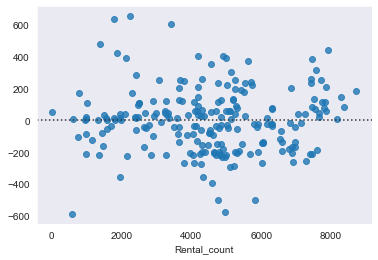

In [107]:
sns.residplot(y_test, y_test_preds)
plt.show()

## Support Vector Regression

In [108]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

In [109]:
svm_est = Pipeline([('scaler',StandardScaler()),('svr',OneVsRestClassifier(SVR()))])

In [110]:
Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1]

In [111]:
param_grid = dict(svr__estimator__gamma=gammas, svr__estimator__C=Cs)

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

rand_grid = RandomizedSearchCV(svm_est, 
                               param_distributions = param_grid,
                               cv = 2,
                               n_iter = 5,
                               scoring = 'neg_mean_absolute_error')

rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svr',
                                              OneVsRestClassifier(estimator=SVR(C=1.0,
                                                                                cache_size=200,
                                                                                coef0=0.0,
                                                                                degree=3,
                                                                                epsilon=0.1,
                                                                                gamma='scale',
                   

In [120]:
rand_grid.best_params_

{'svr__estimator__gamma': 0.01, 'svr__estimator__C': 0.001}

In [128]:
sv_regr = SVR(gamma = 0.01, tol=0.001)

In [129]:
sv_regr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Support Vector Regression: Training MSE, RMSE, R<sup>2</sup>

In [130]:
y_train_preds = sv_regr.predict(X_train)
mse = mean_squared_error(y_train, y_train_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_preds)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:", r2)

MSE: 3735524.247383919
RMSE: 1932.7504358773067
R2: 0.0001211046049703901


### Support Vector Regression: Training MSE, RMSE, R<sup>2</sup>

In [133]:
y_test_preds = sv_regr.predict(X_test)
mse = mean_squared_error(y_test, y_test_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_preds)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:", r2)

MSE: 3772864.2367494865
RMSE: 1942.3862223434057
R2: 0.0004809423104465971


### Residual Plot

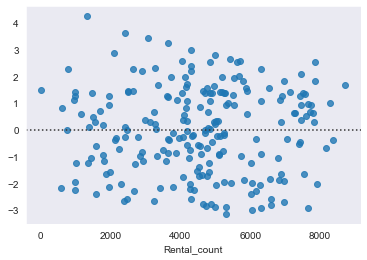

In [132]:
sns.residplot(y_test, y_test_preds)
plt.show()